In [11]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


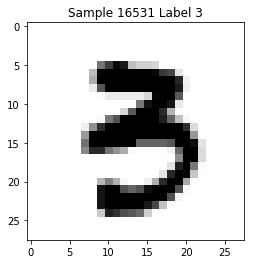

In [18]:
import matplotlib.pyplot as plt

def display_sample(num):
    print mnist.train.labels[num]
    label = mnist.train.labels[num].argmax(axis =0)
    image= mnist.train.images[num].reshape([28,28])
    
    plt.title('Sample %d Label %d'%(num, label))
    plt.imshow(image, cmap= plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(16531)

In [53]:
input_images = tf.placeholder(tf.float32, shape = [None, 784])
target_labels = tf.placeholder(tf.float32, shape= [None, 10])

#setting up our toplogy
hidden_nodes = 101
input_weight = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weight = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))



In [54]:
input_layer = tf.matmul(input_images, input_weight)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer , hidden_weight)
digit_weights = digit_weights + hidden_biases

In [55]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = digit_weights, labels = target_labels))

In [56]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [59]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict = {input_images: batch[0], target_labels: batch[1]})
    
    if(x+1)%100 ==0 :
        print "training epoch" + str(x+1)
        print "Accuracy" + str(accuracy.eval(feed_dict= {input_images :mnist.test.images , target_labels : mnist.test.labels}))

training epoch100
Accuracy0.6909
training epoch200
Accuracy0.7643
training epoch300
Accuracy0.8055
training epoch400
Accuracy0.8178
training epoch500
Accuracy0.843
training epoch600
Accuracy0.8506
training epoch700
Accuracy0.8672
training epoch800
Accuracy0.8773
training epoch900
Accuracy0.8754
training epoch1000
Accuracy0.8856
training epoch1100
Accuracy0.8812
training epoch1200
Accuracy0.8907
training epoch1300
Accuracy0.8936
training epoch1400
Accuracy0.8946
training epoch1500
Accuracy0.8942
training epoch1600
Accuracy0.8881
training epoch1700
Accuracy0.9005
training epoch1800
Accuracy0.9003
training epoch1900
Accuracy0.9105
training epoch2000
Accuracy0.9053


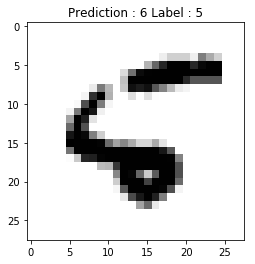

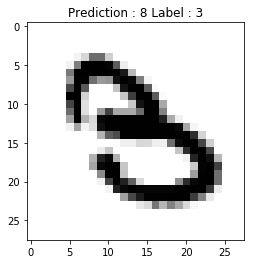

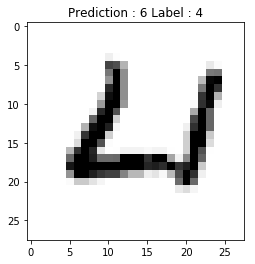

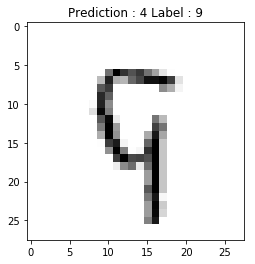

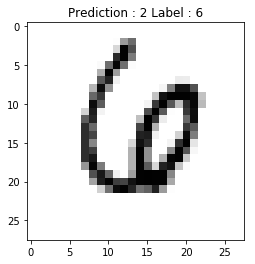

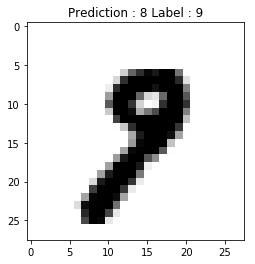

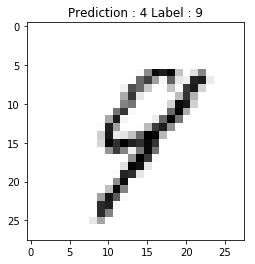

In [63]:
for x in range(100):
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    
    label = y_train.argmax()
    prediction = sess.run(digit_weights, feed_dict = { input_images: x_train}).argmax()
    
    if (prediction != label):
        plt.title('Prediction : %d Label : %d' %(prediction,label))
        plt.imshow(x_train.reshape([28,28]), cmap = plt.get_cmap('gray_r'))
        plt.show()